<h1>Conceitos b&aacute;sicos de processos estoc&aacute;sticos em popula&ccedil;&otilde;es</h1>
<h4>Copyright (2013-15) Fl&aacute;vio Code&ccedil;o Coelho, EMAp-FGV</h4>
<p>Neste m&oacute;dulo revisitamos os elementos b&aacute;sicos da din&acirc;mica de popula&ccedil;&otilde;es, como nascimento, morte, imigra&ccedil;&atilde;o e emigra&ccedil;&atilde;o. Mas agora vamos represent&aacute;-los como realiza&ccedil;&otilde;es de eventos probabil&iacute;sticos.</p>
<h2>Processo Poisson simples</h2>
<p>Neste processo consideramos apenas o nascimento, ou mais genericamente a entrada de indiv&iacute;duos em uma popula&ccedil;&atilde;o de forma aleat&oacute;ria, mas a uma taxa constante $\alpha$.</p>
<p>Seja $N(t, t+dt)$ o n&uacute;mero de novos indiv&iacute;duos que entraram na popula&ccedil;&atilde;o no intervalo $(t, t+dt)$. Ent&atilde;o podemos definir as probabilidades de transi&ccedil;&atilde;o da popula&ccedil;&atilde;o como:</p>
<p>$(i)\, Pr\{N(t, t+dt)=0\}=1-\alpha dt + o(dt)$,</p>
<p>$(ii)\, Pr\{N(t, t+dt)=1\}= \alpha dt +o(dt)$</p>
<p>$(iii)\, Pr\{N(t, t+dt)>1\}= o(dt)$</p>
<p>$(iv)\, N(t, t+dt)$ &eacute; independente de todas as entradas no intervalo $(0, t)$</p>
<p>Aqui, o(dt) denota todos os termos &nbsp;de order inferior a dt.</p>
<h3>Tempo at&eacute; o pr&oacute;ximo evento</h3>
<p>Suponha que $t_0 + Z$ seja o tempo do primeiro evento ap&oacute;s $t_0$. Para determinar a distribui&ccedil;&atilde;o de probabilidade de $Z$, podeŕiamos considerar a distribui&ccedil;&atilde;o $F(t)=Pr(Z\leq t) (t \geq 0)$. Mas &eacute; muito mais f&aacute;cil pensarmos sobre o evento complementar $G(t)=1-F(t)= Pr(Z>t)$, ou seja nenhum evento ocorreu antes de $t$.</p>
<p>Considere um intervalo pequeno $dt >0$, agora vamos dividir os eventos que ocorrem no intervalo $(t_0, t_0+t+dt)$ nos que ocorrem no primeiro intervalo $(t_0, t_{0+t})$ e nos que ocorrem no intervalo subsequente $(t_{0+t}, t_{0+t+dt})$. Podemos ver que</p>
<p>$G(t+dt)=Pr\{Z>t+dt\}$</p>
<p>$=Pr\{Z>t$ e nenhum evento ocorre no intervalo $(t_{0+t}, t_{0+t+dt})\}$&nbsp;</p>
<p>$=Pr\{Z>t\} Pr\{$nenhum evento ocorre no intervalo $(t_{0+t}, t_{0+t+dt})\mid Z>t\}$&nbsp;</p>
<p>aplicando a condi&ccedil;&atilde;o $(iv)$ acima,&nbsp;</p>
<p>$G(t+dt) =Pr\{$nenhum evento ocorre no intervalo $(t_{0+t}, t_{0+t+dt})\}$</p>
<p>Aplicando a condi&ccedil;&atilde;o $(i)$ obtemos</p>
<p>$G(t+dt)=G(t)(1-\alpha dt + o(dt)$</p>
<p>Quando $dt$ tende a $0$, temos</p>
<p>$\frac{dG(t)}{dt}= -\alpha G(t)$</p>
<p>Cuja solu&ccedil;&atilde;o &eacute;</p>
<p>$G(t)=G(0) e^{-\alpha t}$</p>
<p>Como $G(0)=Pr(Z>0)=1$ conclu&iacute;mos que a fun&ccedil;&atilde;o de distribui&ccedil;&atilde;o acumulada de $Z$ &eacute;</p>
<p>$F(t) = Pr(Z \leq t)=1-G(t)= 1- e^{-\alpha t}$</p>
<p>Logo a pdf do tempo at&eacute; o pr&oacute;ximo evento &eacute;: &nbsp;</p>
<p>$f(t)=F'(t)=\alpha e^{-\alpha t} \,\, (\alpha > 0)$</p>
<p>que corresponde &agrave; distribui&ccedil;&atilde;o exponencial com par&acirc;metror $\alpha$.</p>
<h2>Exerc&iacute;cio: Simulando o processo de Poisson</h2>
<p>A partir do exposto acima, implemente uma simula&ccedil;&atilde;o de 100 eventos &nbsp;de um processo de Poisson com taxa $\alpha$. Mostre graficamente que a distribui&ccedil;&atilde;o do tempo at&eacute; o cent&eacute;simo evento segue uma distribui&ccedil;&atilde;o Gamma(100,$\alpha$).&nbsp;</p>

In [4]:
import numpy as np
from numpy.random import exponential as expv
import pylab as P
from numpy import cumsum
import warnings
warnings.filterwarnings('always')
%display typeset
%matplotlib notebook

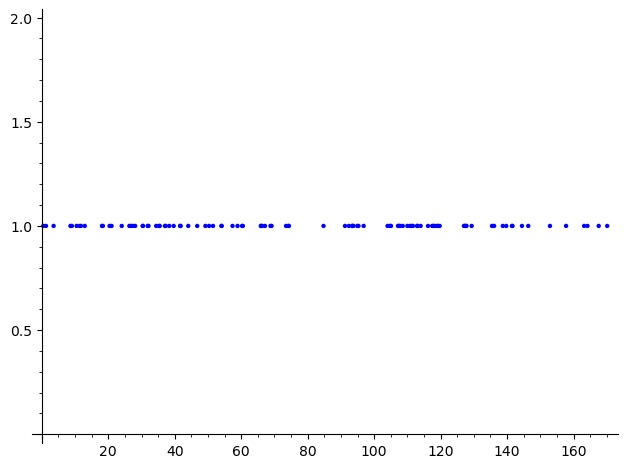

In [5]:
alpha = 1.5
times = cumsum(expv(alpha, size=100))
list_plot(list(zip(times, np.ones(100))))

<IPython.core.display.Javascript object>


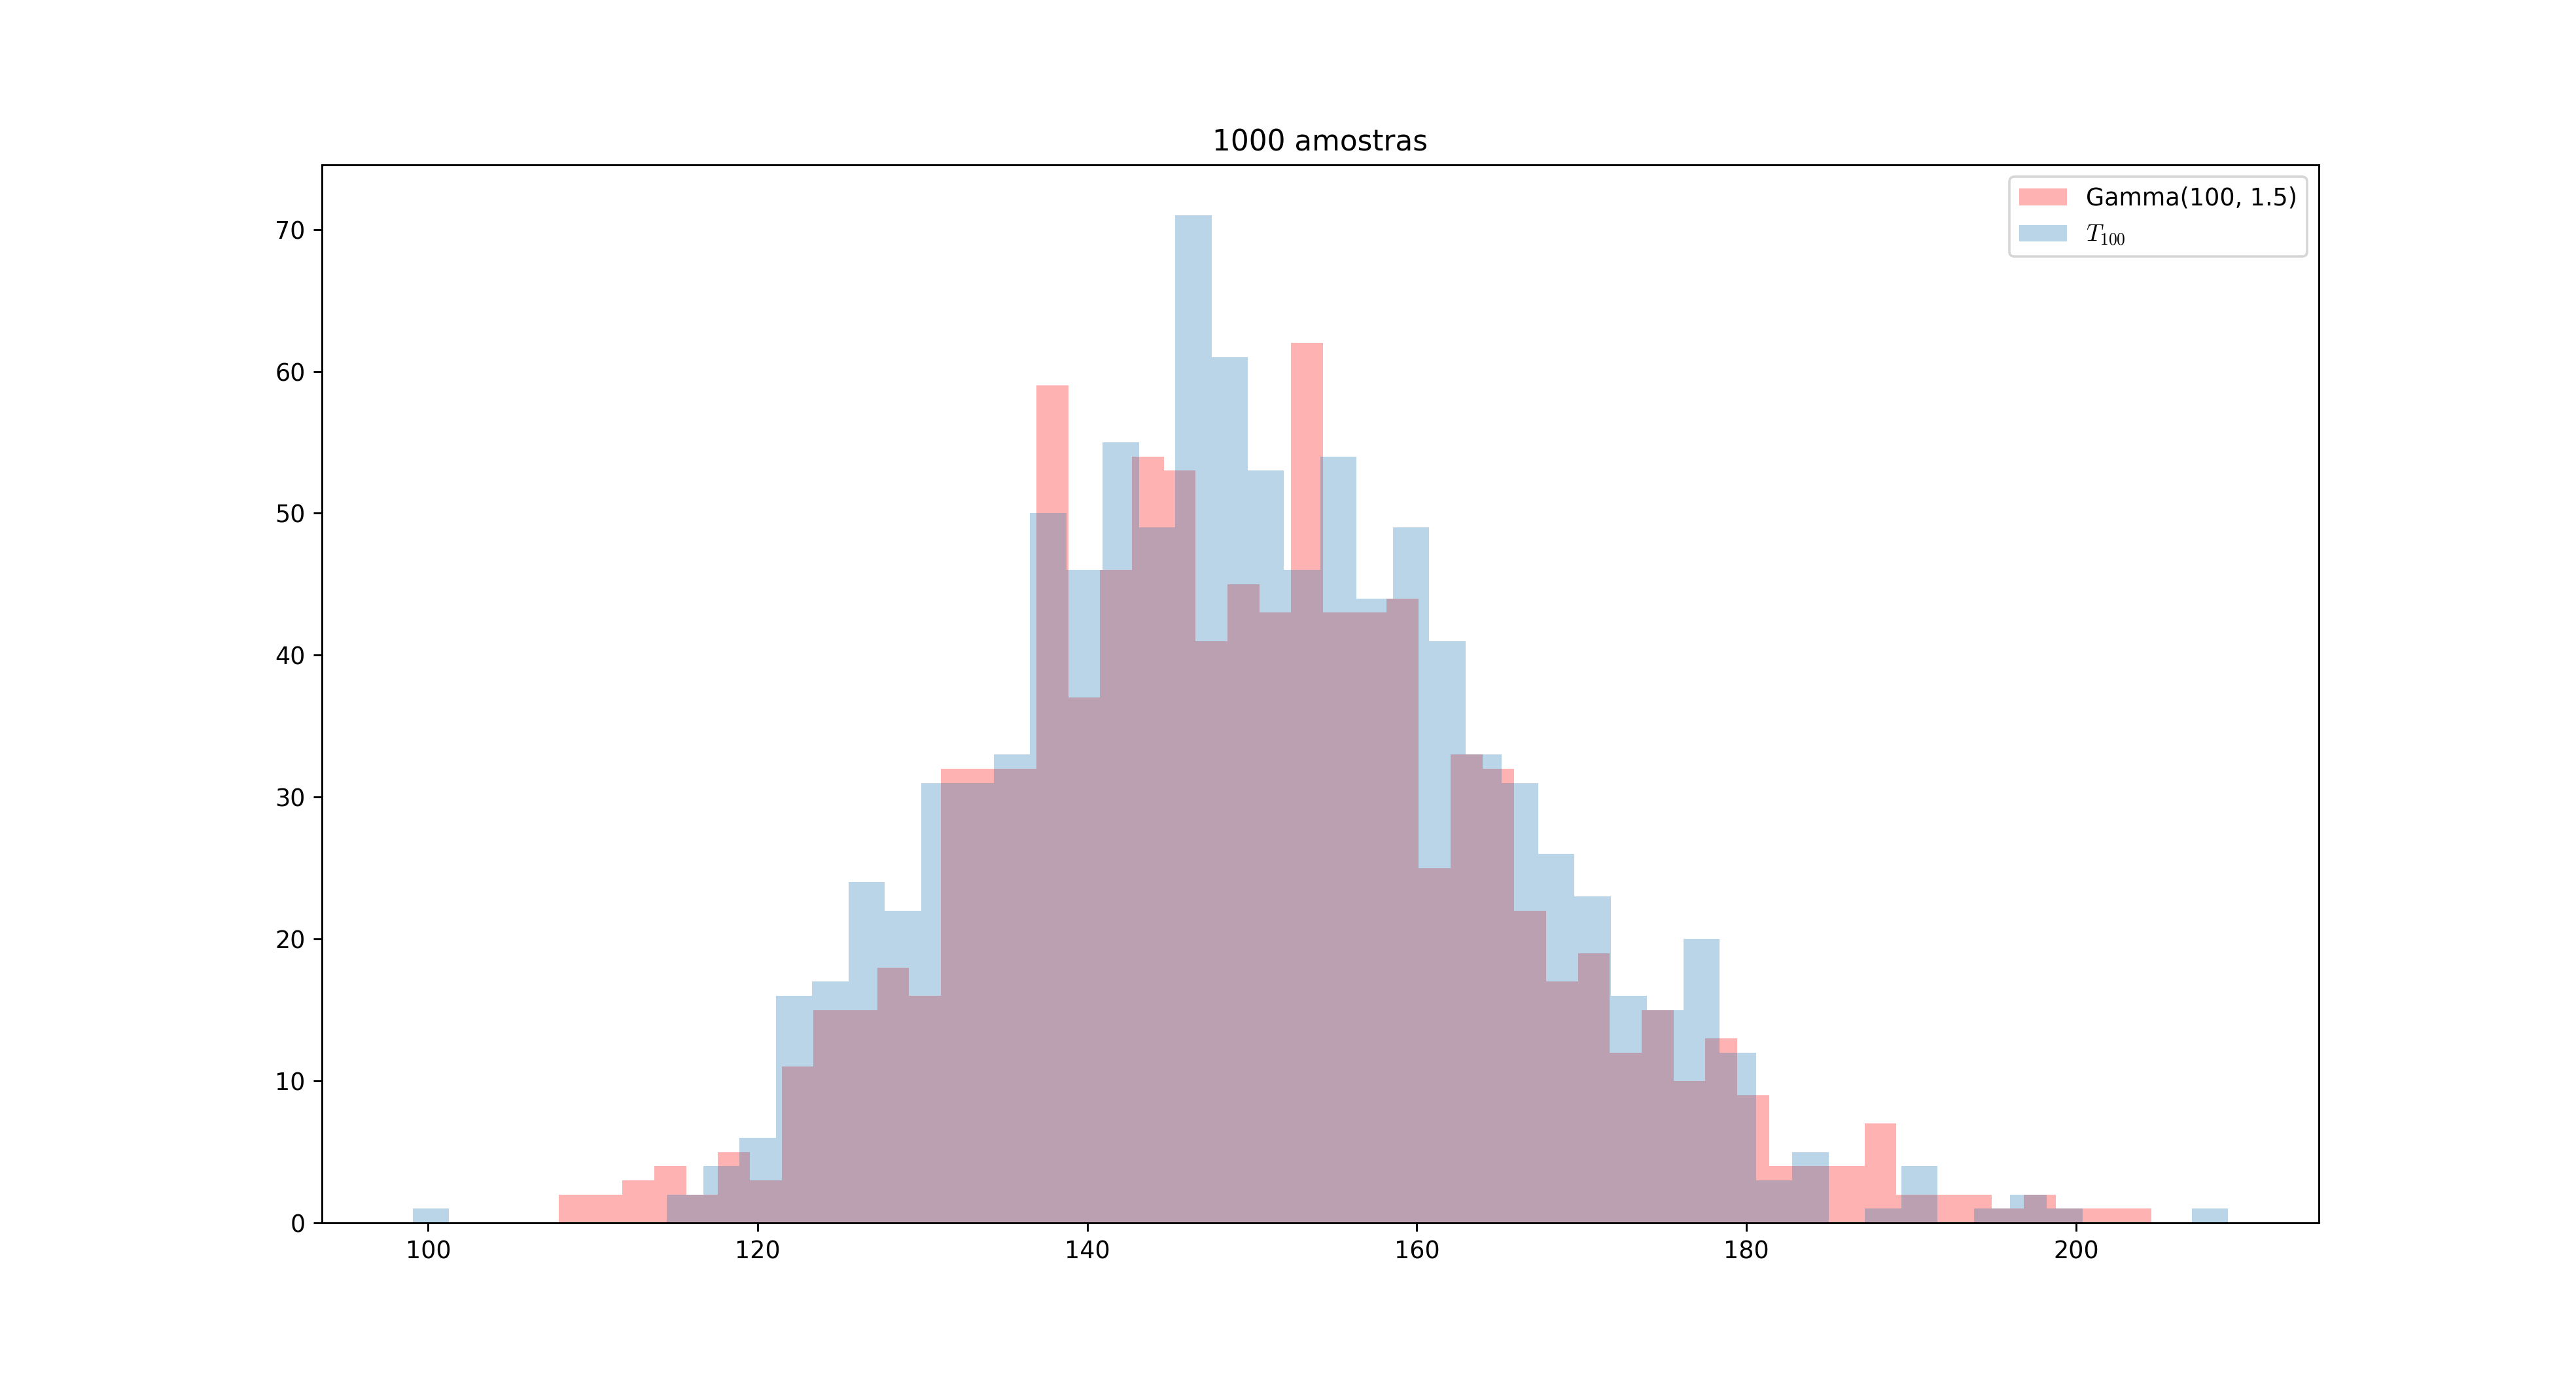

In [6]:
from numpy.random import gamma as gammav
t100 = [cumsum(expv(alpha, size=100))[-1] for i in range(1000)]
gs = gammav(100, alpha, size=1000)
P.figure(figsize=(15,8))
P.hist(gs, bins=50, color='r', alpha=0.3, label='Gamma(100, %1.1f)'%alpha);
P.hist(t100,bins=50, alpha=.3, label='$T_{100}$');
P.title('1000 amostras')
P.legend();

<h1>Equa&ccedil;&otilde;es Diferenciais Estoc&aacute;sticas (EDEs)</h1>
<p>&nbsp;Uma equa&ccedil;&atilde;o diferencial estoc&aacute;stica &eacute; uma equa&ccedil;&atilde;o diferencial na qual um ou mais de seus termos &eacute; um processo estoc&aacute;stico. Por conseguinte, a sua solu&ccedil;&atilde;o tamb&eacute;m &eacute; um processo estoc&aacute;stico. Seguindo a nota&ccedil;&atilde;o do c&aacute;lculo de Ito, um exemplo simples seria:</p>

$$dX_t = a(X_t) \, d t + b(X_t) \, d W_t,$$

<p>&nbsp;</p>
<p>onde $W_t$ &eacute; um processo de Wiener, ou seja, um processo estoc&aacute;stico em tempo cont&iacute;nuo, tamb&eacute;m conhecido como movimento browniano.</p>
<p>A solu&ccedil;&atilde;o anal&iacute;tica destas equa&ccedil;&otilde;es foge ao escopo deste curso. Mas podemos explorar solu&ccedil;&otilde;es num&eacute;ricas.</p>
<h2>Modelando com EDEs</h2>
<p>Vamos agora desenvolver alguns modelos simples usando EDEs.</p>
<h3>Din&acirc;mica de uma popula&ccedil;&atilde;o (Processo de nascimentos e mortes)</h3>
<p>Seja &nbsp;o seguinte modelo da din&acirc;mica demogr&aacute;fica de uma popula&ccedil;&atilde;o:</p>
<p>$$\frac{\mathrm{d}x}{\mathrm{d}t}=b x - d x; \,\,\,\,\,\, x(0)=x_0$$</p>
<p>onde $x(t)$ &eacute; a popula&ccedil;&atilde;o no tempo $t$ e $b$ e $d$ s&atilde;o as taxas de nascimento e morte, respectivamente. A solu&ccedil;&atilde;o deste sistema &eacute;:</p>
<p>$$x(t)= x_0e^{(b-d)t}$$</p>
<p>&nbsp;</p>

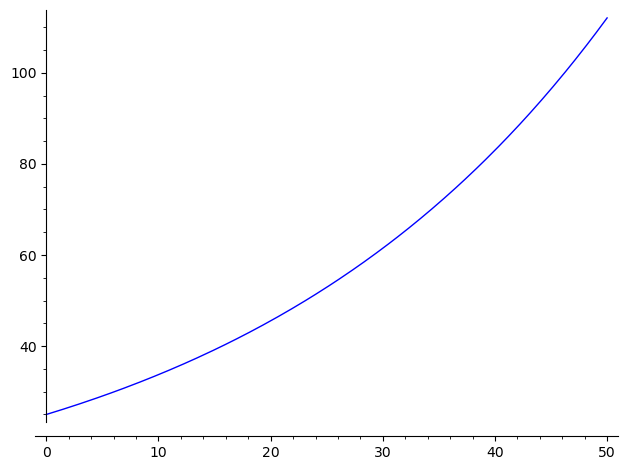

In [7]:
var('t')
b = 0.3
d = 0.27
x0 = 25
x(t) = x0*exp((b-d)*t)
plot(x(t),(t,0,50))

<p>Naturalmente, popula&ccedil;&otilde;es naturais n&atilde;o variam de forma t&atilde;o bem comportada. Como existem heterogeneidades em uma popula&ccedil;&atilde;o real, $x(t)$ como derivado acima corresponde ao valor esperado da popula&ccedil;&atilde;o, e n&atilde;o ao valor exacto de um processo de nascimentos e mortes no tempo $t$. Al&eacute;m do mais $x(t)$ varia continuamente enquanto que popula&ccedil;&otilde;es variam de forma discreta.</p>
<p>Um modelo estoc&aacute;stico da demografia desta popula&ccedil;&atilde;o, preservando as mesmas taxas de nascimento e morte pode ser constru&iacute;do, nos oferecendo uma s&eacute;rie temporal mais real&iacute;stica.</p>
<p>&nbsp;</p>
<p>Para nos ajudar a chegar na EDE correspondente, vamos construir um modelo estoc&aacute;stico direto primeiro. Vamos considerar os nascimentos e mortes aleat&oacute;rios, em um curto intervalo de tempo $\Delta t$.</p>
<p>Neste intervalo, s&atilde;o poss&iacute;veis tr&ecirc;s tipos de altera&ccedil;&otilde;es na popula&ccedil;&atilde;o:</p>
<ol>
<li>Um nascimento, $\beta_1=1$,</li>
<li>uma morte, $\beta_2=-1$,</li>
<li>ou nada, $\beta_3=0$.</li>
</ol>
<p>Estas altera&ccedil;&otilde;es ocorrer&atilde;o com &nbsp;as &nbsp;respectivas probabilidades:</p>
<ol>
<li>$P_1 = bx\Delta t$,</li>
<li>$P_2 = dx\Delta t$ e</li>
<li>$P_3 = 1-(b+d)x\Delta t$.</li>
</ol>
<p>Seja $p_k(t) = P(X(t) = x_k)$ a probabilidade de ser ter $x_k$ indiv&iacute;duos na popula&ccedil;&atilde;o no instante de tempo $t$.</p>
<p>Isto nos leva a:</p>
<p>$$p_k(t+\Delta t) = p_k(t)\left[1 -bx_k\Delta t -dx_k\Delta t\right]+p_{k-1}(t)\left[bx_{k-1}\Delta t\right]+p_{k+1}(t)\left[dx_{k+1}\Delta t\right]$$</p>
<p>Pode-se demonstrar que para $\Delta t$ muito pequeno, que a EDE abaixo satisfaz aproximadamente a mesma distribui&ccedil;&atilde;o de probabilidade que o processo estoc&aacute;stico discreto acima.</p>
<p>$$\mathrm{d}x(t) = (b - d)x \mathrm{d}t + \sqrt{((b+d)x)}\mathrm{d}W(t)$$</p>
<p>onde $W(t)$ &eacute; um processo de Wiener.</p>
<p>Para resolver numericamente esta EDE precisamos entender o m&eacute;todo de Euler-Maruyama.</p>
<h2>M&eacute;todo de Euler-Maruyama</h2>
<p>Considere a seguinte equa&ccedil;&atilde;o diferencial estoc&aacute;stica de&nbsp;&nbsp;<a title="Itō calculus" href="http://en.wikipedia.org/wiki/It%C5%8D_calculus">Itō</a>&nbsp;:</p>
<p>$$\mathrm{d}X_t = a(X_t) \, \mathrm{d} t + b(X_t) \, \mathrm{d} W_t,$$</p>
<p>Com&nbsp;<a href="http://en.wikipedia.org/wiki/Initial_condition" target="_blank">condi&ccedil;&otilde;es iniciais</a>&nbsp;$X_0=x_0$, onde where $W_t$<em>&nbsp;&eacute; o&nbsp;<a href="http://en.wikipedia.org/wiki/Wiener_process" target="_blank">processo de Wiener</a></em>, e suponha que queremos resolver esta EDE em um dado intervalo $[0, T]$.&nbsp;Ent&atilde;o a aproxima&ccedil;&atilde;o de&nbsp;<strong>Euler&ndash;Maruyama approximation</strong>&nbsp;&agrave; solu&ccedil;&atilde;o verdadeira de $X$ &eacute; a cadeia de Markov $Y$ definida abaixo:</p>
<ul>
<li>Divida o interval $[0,T]$ em $N$ sub-intervalos iguais de comprimento $\Delta T \gt 0$; 
    $$0 = \tau_{0} < \tau_{1} < \cdots < \tau_{N} = T \mbox{ e } \Delta t = T/N;$$</li>
<li>fa&ccedil;a $Y_0=x_0;$</li>
<li>Defina $Y_n$ recursivamente para $1 \leq n \leq N$: $$\, Y_{n + 1} = Y_n + a(Y_n) \Delta t + b(Y_n) \Delta W_n,$$ onde $$\Delta W_n=W_{\tau_{n+1}}-W_{\tau_n}.$$ $\Delta W \sim N(0,\Delta t)$, i.e. i.i.d. com m&eacute;dia $0$ e vari&acirc;ncia $\Delta t$</li>
</ul>
<h3>Solu&ccedil;&atilde;o num&eacute;rica do processo de nascimento e morte</h3>
<p>Vamos agora definir as fun&ccedil;&otilde;es que correspondem &agrave;s partes determin&iacute;sticas e estoc&aacute;sticas da nossa EDE.</p>

In [8]:
determ = lambda x,b,d:(b-d)*x
stoc = lambda x,b,d: sqrt((b+d)*x)

<p>Agora definimos uma fun&ccedil;&atilde;o que implementa o m&eacute;todo de Euler-Maruyama, Junto com uma figura interativa aplicando-o ao nosso modelo.</p>

In [9]:
def EulerMaruyama(tstart, ystart, tfinish, nsteps, f1, f2, params):
    sol = np.zeros(nsteps)
    tvals = np.empty(nsteps)
    sol[0] = ystart 
    tvals[0] = tstart 
    h = (tfinish-tstart)/nsteps
    for step in range(nsteps-1): 
        sol[step+1]=sol[step] + h*f1(sol[step],*params) +  f2(sol[step],*params)*normalvariate(0,h)
        tvals[step+1]=(tvals[step] + h) 
    return list(zip(tvals,sol))
    
out = Graphics()
save(out,'temp')

@interact
def EulerMaruyamaExample(b = slider(srange(0,1,.01),default=0.3),
                        d = slider(srange(0,1,.01),default=0.27),
                        plots_at_a_time = slider(range(1,100),default=10), 
                        number_of_steps = slider(range(1,1000),default=500), 
                        clear_plot = checkbox(True), 
                        auto_update=False):
    pretty_print(html(r'<center>Solução pelo método de Euler-Maruyama <br>da EDE:</center>'))
    pretty_print(html(r'<center>$\mathrm{d}x(t) = (b - d)x \mathrm{d}t + \sqrt{((b+d)x)}\mathrm{d}W(t)$</center>'))
    sol = EulerMaruyama(0,25,50,number_of_steps,determ,stoc,(b,d))
    emplot = list_plot(sol,plotjoined=True, color='cyan')
    exact_plot = plot(x(t),(t,0,50), color='red', legend_label=u'Solução determinística')
    for i in range(1,plots_at_a_time):
        sol2 = EulerMaruyama(0,25,50,number_of_steps,determ,stoc,(b,d))
        sol = [(v[0],sol[n][1]+v[1]) for n, v in enumerate(sol2)]
        emplot = emplot + list_plot(sol2,plotjoined=True, alpha=0.3)
    
    if clear_plot:
        avgplot = list_plot([(i,v/plots_at_a_time) for i,v in sol],plotjoined=True, color='green', legend_label=u"média")
        out = emplot + exact_plot + avgplot
        save(out,'temp')
    else:
        out = load('temp')
        out = out + emplot + exact_plot
        save(out,'temp')
    show(out, figsize = [8,5])

Manual interactive function <function EulerMaruyamaExample at 0x7ff5385b88b0> with 5 widgets
  b: SelectionSli…

<h2>O M&eacute;todo de Milstein</h2>
<p>O m&eacute;todo de Milstein parte da mesma ideia de do m&eacute;todo de EM, ou seja discretizar a din&acirc;mica em n intervalos iguais. A forma como ser&atilde;o calculados os valores da fun&ccedil;&atilde;o em fun&ccedil;&atilde;o de seus valores anteriores &eacute; que muda:</p>
<p>$$Y_{{n+1}}=Y_{n}+a(Y_{n})\Delta t+b(Y_{n})\Delta W_{n}+{\frac {1}{2}}b(Y_{n})b'(Y_{n})\left((\Delta W_{n})^{2}-\Delta t\right)$$</p>
<p>onde $b'$ &eacute; a derivada de $b(x)$ com respeito a $x$, e $\Delta W_{n}=W_{{\tau _{{n+1}}}}-W_{{\tau _{n}}}$, &nbsp;s&atilde;o vari&aacute;veis aleat&oacute;rias i.i.d. de distribui&ccedil;&atilde;o Normal com m&eacute;dia 0 e vari&acirc;ncia $\Delta t$.</p>
<h4>Exerc&iacute;cio:</h4>
<p>Modifique o solver acima implementando o <a href="https://en.wikipedia.org/wiki/Milstein_method">m&eacute;todo de Milstein</a>.&nbsp;</p>

In [10]:
def milstein(tstart, ystart, tfinish, h, f1, f2, params):
    nsteps = int((tfinish-tstart)/h)
    sol = np.zeros(nsteps)
    tvals = np.zeros(nsteps)
    sol[0] = ystart 
    tvals[0] = tstart 
    def deriv(f,x, params,h=0.0001):
        if x-h <0:
            h=x
        return (f(x+h,*params)-f(x-h, *params))/(2*h)
    
    for step in range(nsteps-1):
        R = normalvariate(0,h)
        sol[step+1]=sol[step] + h*f1(sol[step],*params) +  f2(sol[step],*params)*R + 0.5*f2(sol[step],*params)*deriv(f2,sol[step],params) * (R**2-h)
        tvals[step+1]=(tvals[step] + h)
    return list(zip(tvals,sol))

out = Graphics()
save(out,'temp')

@interact
def MilsteinExample(b = slider(srange(0,1,.01),default=0.3),
                    d = slider(srange(0,1,.01),default=0.27),
                    tfinish = slider(range(10,1000), default=50),
                    plots_at_a_time = slider(range(1,100),default=10), 
                    passo = slider(srange(0,.5,.001),default=0.25), 
                    clear_plot = checkbox(True), 
                    auto_update=True):
    pretty_print(html(r'<center>Solução pelo método de Milstein <br>da EDE:</center>'))
    pretty_print(html(r'<center>$\mathrm{d}x(t) = (b - d)x \mathrm{d}t + \sqrt{((b+d)x)}\mathrm{d}W(t)$</center>'))
    sol = milstein(0,25,tfinish,passo,determ,stoc,(b,d))
    mplot = list_plot(sol,plotjoined=False, color='cyan')
#     show(mplot)
    exact_plot = plot(25*exp((b-d)*t),(t,0,tfinish), color='red', legend_label=u'Solução determinística')
    for i in range(1,plots_at_a_time):
        sol2 = milstein(0,25,tfinish,passo,determ,stoc,(b,d))
        sol = [(v[0],sol[n][1]+v[1]) for n, v in enumerate(sol2)]
        mplot = mplot + list_plot(sol2,plotjoined=False, alpha=0.3)
    
    if clear_plot:
        avgplot = list_plot([(i,v/plots_at_a_time) for i,v in sol],plotjoined=False, color='green', legend_label=u"média")
        out = mplot + exact_plot + avgplot
        save(out,'temp')
    else:
        out = load('temp')
        out = out + mplot + exact_plot
        save(out,'temp')
    show(out, figsize = [8,5])

Interactive function <function MilsteinExample at 0x7ff53864adc0> with 6 widgets
  b: SelectionSlider(descript…

## Derivando uma EDE para um modelo SIR
seja $\Delta X(t)=(\Delta S, \Delta I)^T$, onde $\Delta X_i = X_i(t+\Delta t) - X_i(t)$, $i=1,2$.

Então o valor esperado de $\Delta X(t)$ na escala detempo de $\Delta t$ é:
$$E(\Delta X(t)) = \begin{pmatrix}-\frac{\beta}{N} S I\\ \frac{\beta}{N} S I -\gamma I\end{pmatrix} \Delta t.$$
A matriz de covariância de $\Delta X(t)$ é $V(\Delta X(t))\approx E(\Delta X(t)[\Delta X(t)]^T$, ou seja,
$$V(\Delta x(t))=\begin{pmatrix}\frac{\beta}{N} S I & -\frac{\beta}{N} S I\\
-\frac{\beta}{N} S I & \frac{\beta}{N} S I + \gamma I
\end{pmatrix}\Delta t.$$

A partir dos resultados acima podemos chegar ao seguinte sistema de equações diferenciais estocásticas para o modelo SIR:

\begin{align}
\begin{matrix}\frac{dS}{dt}&=-\frac{\beta}{N} S I+B_{11}\frac{dW_1}{dt}+B_{12}\frac{dW_2}{dt}\\
\frac{dI}{dt} &= \frac{\beta}{N} S I -\gamma I+B_{21}\frac{dW_1}{dt}+B_{22}\frac{dW_2}{dt}
\end{matrix}
\end{align}

onde $B=\sqrt{V(\Delta X(t))}$. 

<h1>Equa&ccedil;&otilde;es de Kolmogorov</h1>
<p>Tamb&eacute;m conhecidas como "Markov Jump processes", estas equa&ccedil;&otilde;es descrevem um processo markoviano cont&iacute;nuo e diferenci&aacute;vel em um espa&ccedil;o de estados discreto e finito. A equa&ccedil;&otilde;es de Kolmogorov (anter&oacute;grada e retr&oacute;grada), modelam o problema de uma forma ligeiramente diferente. Nas EDE modelamos um sistema din&acirc;mico estoc&aacute;stico como a soma de um processo m&eacute;dio, $a(X_t)dt$, e sua covari&acirc;ncia, $b(X_t)dW$. Nas equa&ccedil;&otilde;es de Kolmogorov, modelamos a taxa de varia&ccedil;&atilde;o das probabilidaes de transi&ccedil;&atilde;o. Logo sua vers&atilde;o anter&oacute;grada &eacute;:</p>
<p>$$\frac{dP(t)}{dt} =QP(t),$$</p>
<p>onde $P(t)=(p_{ji}(t)$ &eacute; a <em>matriz de probabilidades de transi&ccedil;&atilde;o</em> e $Q=(q_{ji})$, &eacute; a <em>matriz geradora</em>. De forma similar, a vers&atilde;o retr&oacute;grada &eacute; dada por:</p>
<p>$$\frac{dP(t)}{dt} =P(t)Q$$</p>
<p>&nbsp;</p>
<p>Os m&eacute;todos para solu&ccedil;&atilde;o num&eacute;rica deste tipo de processo estoc&aacute;stico foram originalmente desenvolvidos para modelar rea&ccedil;&otilde;es qu&iacute;micas, mas podem ser aplicados a quaisquer modelos compartimentais cujo espa&ccedil;o de estados seja discreto. Estes m&eacute;todos se dividem em exatos e aproximados. Dentre os m&eacute;todos exatos o m&eacute;todo "<a href="http://en.wikipedia.org/wiki/Gillespie_algorithm" target="_blank">direto</a>" proposto por GIllespie em 1977 &eacute; o mais usado. Resumidamente, o m&eacute;todo de gillespie &eacute; um m&eacute;todo iterativo que faz uso de duas vari&aacute;veis aleat&oacute;rias: uma representando o tempo at&eacute; o pr&oacute;ximo evento, e a segunda. multinomial, para escolher qual dos evento ocorrer&aacute;.</p>
<p>Para descrever esta classe de modelos, &eacute; interessante pensar no modelo como um vetor de estados</p>
<p>$$X(t)=[X_1(t), X_2(t), \ldots, X_N(t)]$$</p>
<p>Onde $X_n(t)$ &eacute; a quantidade do $n$-&eacute;simo tipo no tempo $t$.</p>
<p>Existem $M$ reac&otilde;es, envolvendo os tipos existentes, que podem ocorrer alterando o estado do sistema. Cada rea&ccedil;&atilde;o &eacute; caracterizada por uma fun&ccedil;&atilde;o de propens&atilde;o $a_m$ e um vetor de altera&ccedil;&atilde;o de estados $V_m=[V_{m1}, \ldots , V_{mN} ]$.</p>
<p>&nbsp;</p>

## Implementando processos markovianos em tempo contínuo
Abaixo vamos aprender a simular um modelo SIR estocástico simples usando apenas as bibliotecas numpy e scipy. Vamos simular a versão determinística e também algumas realizações da versão estocástica.

In [15]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
from numpy.random import rand, gamma, exponential, poisson, multinomial
import pylab as P


def ode(y,t, *parms):
    S,I = y
    beta, gam = parms

    return[-beta/N*S*I,
            beta/N*S*I - gam*I
    ]




  
def run_sir(N, tf, nsims, *pars):
    """
    Runs simulation.

    :parameters:
    :param N: Population size
    :param tf: Stop time
    :param nsims:  Number of simulations
    :param pars: epidemic parameters 
    """
    beta, gam, I0 = pars

    sims = {}
    for k in range(nsims):
        t = [0]
        S = [N-I0]
        I = [I0]
        gts =[]
        while I[-1] > 0 and t[-1] < tf:
            U = rand()

            R = beta*S[-1]*I[-1]/N + gam*I[-1]
            pinf = ((beta/N)*S[-1]*I[-1])/R # Probability of next event being an infection
            gt = exponential(1/R)

            if U <= pinf: # Next event is an infection
                
                S.append(S[-1]-1)
                I.append(I[-1]+1)
                t.append(t[-1] + gt)
                gts.append(gt)
            else: # next event is a recovery
                S.append(S[-1])
                I.append(I[-1]-1)
                #print('removal')
                t.append(t[-1] + gt)  # -np.log(rand())/R)
        sims[k] = (np.array([t,S,I]).T, np.array(t), gts)
        P.plot(t,I,label='$O_t^{}$'.format(k+1), drawstyle='steps-post')
    return sims

<IPython.core.display.Javascript object>


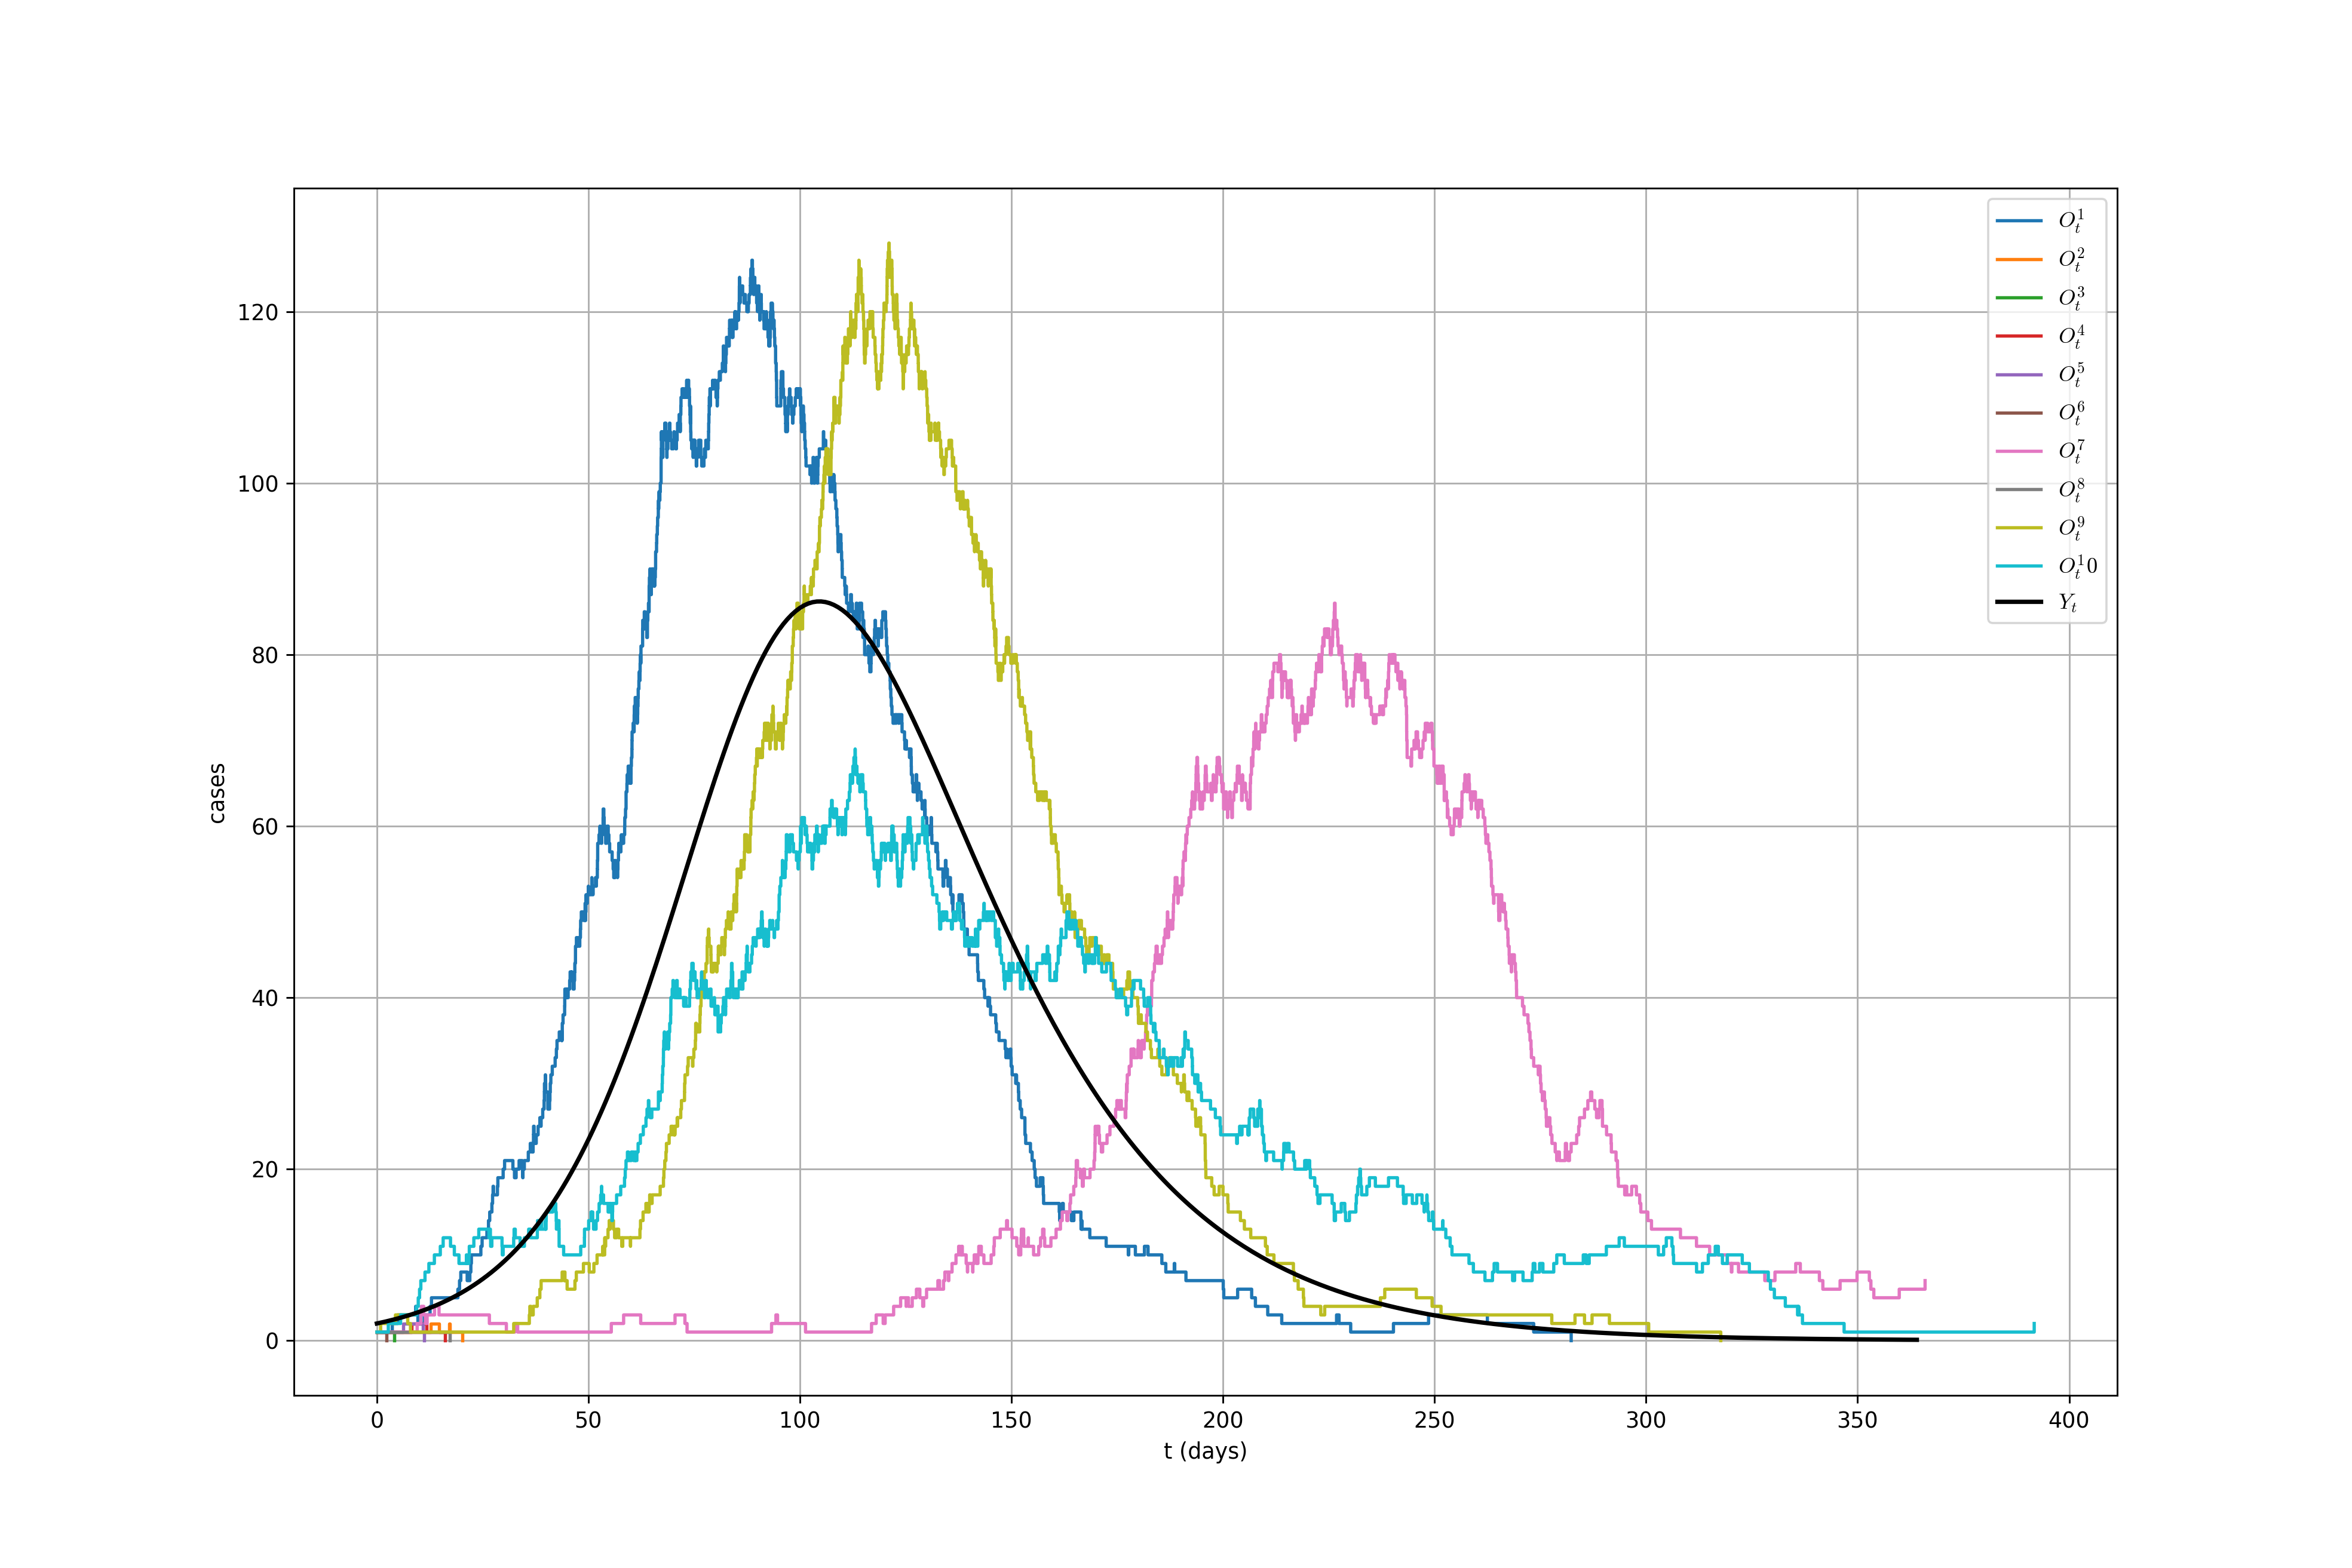

In [16]:
beta=0.1
gam = 1/21
N = 500
constant = False
I0 = 1
tf = 365
ts = np.arange(tf)
nsims = 10
P.figure(figsize=(15,10))
sims = run_sir(N,tf,nsims, beta, gam, I0)
Is = [i[0][:,2] for i in sims.values()]
EI = odeint(ode, [N-2,2], ts, args=(beta,gam))
P.plot(ts, EI[:,1], 'k-',lw=2, label='$Y_t$')
P.legend(loc=0)
P.xlabel("t (days)")
P.ylabel("cases")
P.grid()
P.savefig('simulation.png')

Agora vamos simular uma versão extendida do modelo SIR com demografia, ou seja, com nascimentos e mortes.

In [19]:
def SIRd(y,t, *parms):
    S,I = y
    alpha, beta, gam, N = parms
    betat = lambda t: beta+(0.0*beta)*np.cos((2*np.pi*t)/365.)
    beta = betat(t)
    return[alpha*N-beta*S*I/N -alpha*S,
            beta*S*I/N - gam*I -alpha*I
    ]


def sir_dem(N, tf, nsims, *pars):
    """
    Runs simulation.

    :parameters:
    :param N: Population size
    :param tf: Stop time
    :param nsims:  Number of simulations
    :param gtd: Generation time distribution: 'e' for exponential anything else for gamma
    :param pars: epidemic parameters 
    """
    alpha, beta, gam, I0, Tmed, constant = pars
    R0=beta/(gam+alpha)
    sims = {}
    for k in range(nsims):
        t = [0]
        S = [N-I0]
        I = [I0]
        gts =[]
        while I[-1] > 0 and t[-1] < tf:
            T =t[-1]
            R = alpha*N+beta*S[-1]*I[-1]/N + gam*I[-1] + alpha*S[-1] + alpha*I[-1]
            pbirth = alpha*N/R  # Probability of the next event being a birth (S -> S+1)
            pinf = ((beta/N)*S[-1]*I[-1])/R # Probability of next event being an infection
            prec = gam*I[-1]/R  # Probability of the next event being a recovery (I -> I-1)
            pds = alpha*S[-1]/R
            pdi = alpha*I[-1]/R
            ev = multinomial(1, [pbirth, pinf, prec, pds, pdi]).nonzero()
            gt = exponential(1/R)
            if ev[0][0] == 0: #  event is a birth
                S.append(S[-1]+1)
                I.append(I[-1])
            elif ev[0][0] == 1:  #  event is an infection
                S.append(S[-1]-1)
                I.append(I[-1]+1)
            elif ev[0][0] == 2:  # event is a recovery
                S.append(S[-1])
                I.append(I[-1]-1)
            elif ev[0][0] == 3:  # event is a susceptible death
                S.append(S[-1]-1)
                I.append(I[-1])
            elif ev[0][0] == 4: # next event is a infectious death
                S.append(S[-1])
                I.append(I[-1]-1)
            t.append(t[-1] + gt)
            gts.append(gt)
        sims[k] = (np.array([t,S,I]).T, np.array(t), gts)
        P.plot(t,I,label='$O_t^{}$'.format(k+1), alpha=0.3, drawstyle='steps-post')
        #P.plot(t,R0*(np.array(S)/N),label='$R_t^{}$'.format(k+1), alpha=0.3, drawstyle='steps-post')
    return sims

R0=1.73553719008264
Endemic Equilibrium: S: 1719.92857142857: I:219.557851239669


<IPython.core.display.Javascript object>


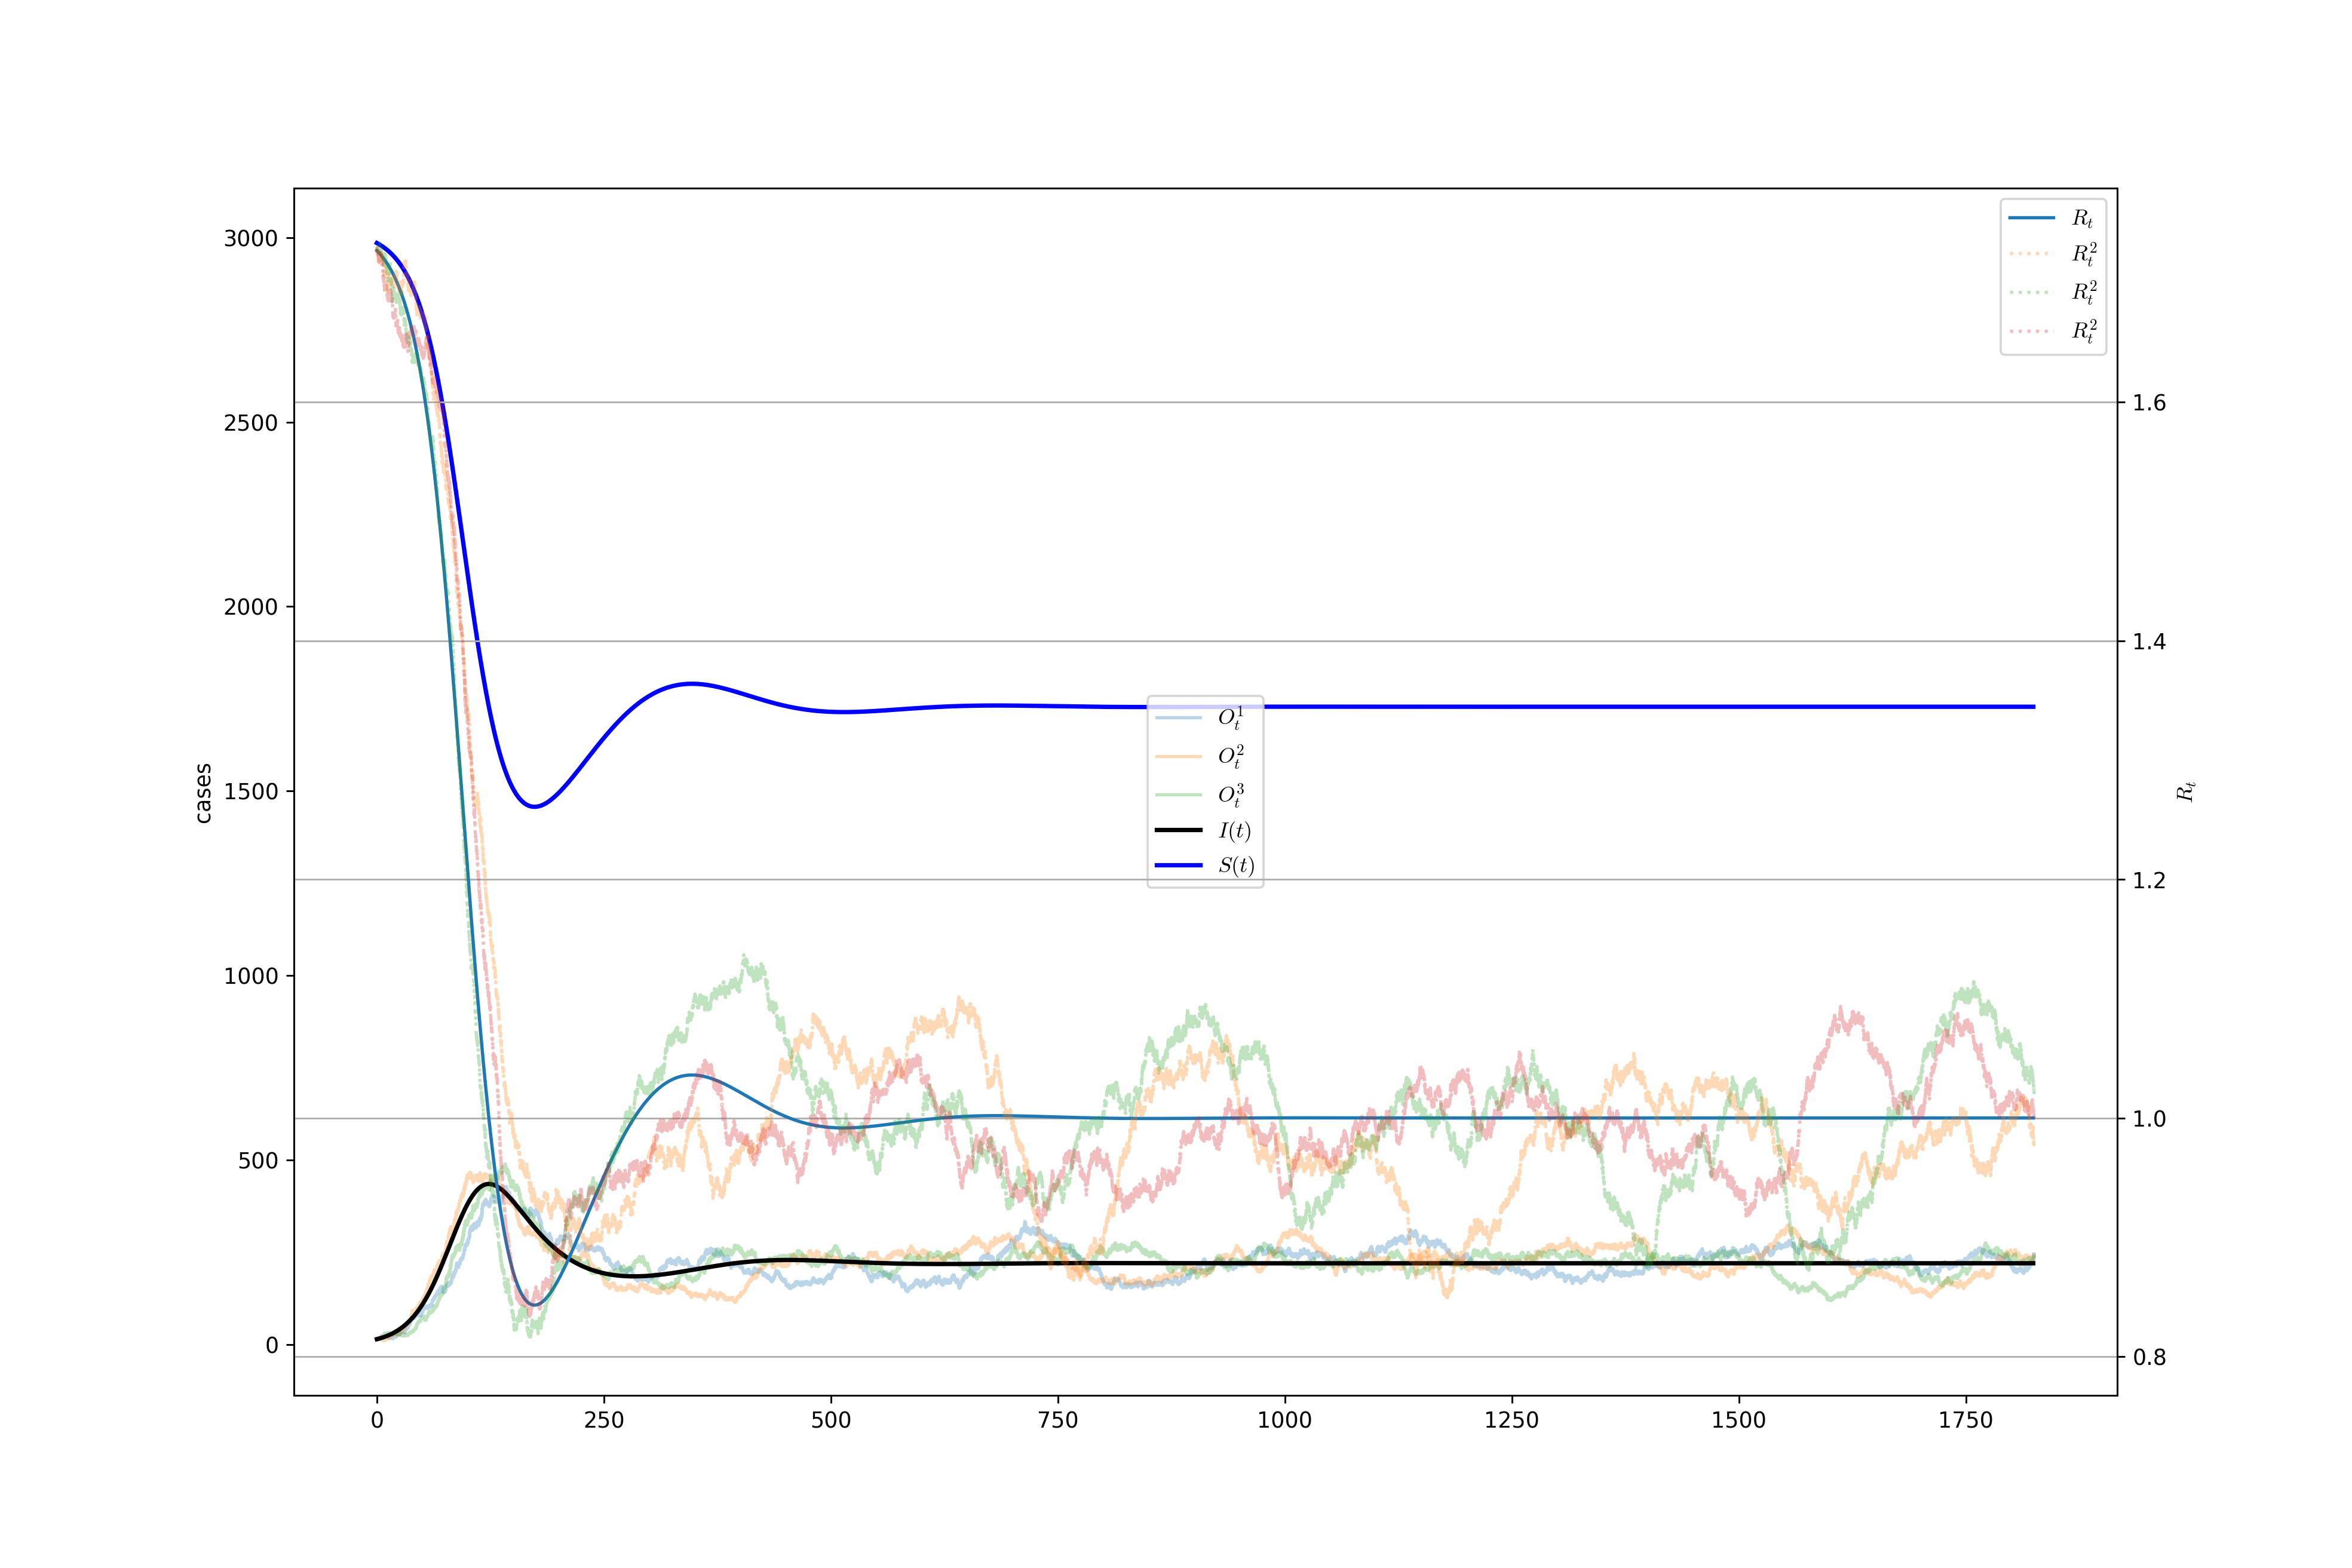

In [20]:
alpha = 0.01
beta=0.1
gam = 1/21
R0 = beta/(alpha+gam)
N = 3000
I0 = 15
S0 = N-I0
print("R0={}".format(R0))
print("Endemic Equilibrium: S: {}: I:{}".format(S0*(alpha+gam)/beta, S0*alpha/beta*(R0-1)))
Tmed = 20
constant = False
P.figure(figsize=(15,10))
tf = 3650//2
ts = np.arange(tf)
nsims = 3
sims = sir_dem(N,tf,nsims, alpha, beta, gam, I0, Tmed, constant)
Is = [i[0][:,2] for i in sims.values()]
EI = odeint(SIRd, [N-I0,I0], ts, args=(alpha,beta,gam, N))

P.plot(ts, EI[:,1], 'k-',lw=2, label='$I(t)$')
P.plot(ts, EI[:,0], 'b-',lw=2, label='$S(t)$')
P.ylabel("cases")
P.legend(loc='center')
ax2 = P.gca().twinx()
ax2.plot(ts,EI[:,0]/N*R0, label='$R_t$')
for i in range(nsims):
    ax2.plot(sims[i][0][:,0], R0*sims[i][0][:,1]/N,label='$R_t^{}$'.format(1+1), alpha=0.3, linestyle=':')
ax2.plot()
ax2.set_ylabel('$R_t$')
P.legend(loc=0)
P.xlabel("t (days)")
P.grid()
P.savefig('simulation_dem.png')

<h2>Simulando modelos estoc&aacute;sticos em Python</h2>
<p>A abordagem acima demonstra como é simples implementar uma simulação estocástica a partir das equações de Kolmogorov. Contudo  podemos simplificar ainda mais a nossa vida, usando uma biblioteca de que implementa o algoritmo "direto" de Gillespie, assim como algumas de suas varia&ccedil;&otilde;es: o Stochpy. Para executar o c&oacute;digo abaixo, &eacute; necess&aacute;rio instalar o stochpy no Sage, uma vez que este n&atilde;o faz parte da distribui&ccedil;&atilde;o padr&atilde;o do Sage.</p>

In [2]:
!pip3 install --user stochpy

You should consider upgrading via the '/home/fccoelho/Downloads/SageMath/local/bin/python3 -m pip install --upgrade pip' command.


In [8]:
import stochpy;
import os


#######################################################################
#                                                                     #
#            Welcome to the interactive StochPy environment           #
#                                                                     #
#######################################################################
#  StochPy: Stochastic modeling in Python                             #
#  http://stochpy.sourceforge.net                                     #
#  Copyright(C) T.R Maarleveld, B.G. Olivier, F.J Bruggeman 2010-2015 #
#  DOI: 10.1371/journal.pone.0079345                                  #
#  Email: tmd200@users.sourceforge.net                                #
#  VU University, Amsterdam, Netherlands                              #
#  Centrum Wiskunde Informatica, Amsterdam, Netherlands               #
#  StochPy is distributed under the BSD licence.                      #
###############################################################

<p>Para escrever um modelo no Pysces, precisamos utilizar a <a href="http://stochpy.sourceforge.net/html/inputfile_doc.html#pysces-inputfile" target="_blank">Pysces Modeling language</a>, vejamos como fica um simples modelo SIR</p>

In [11]:
modelpath = '~/Stochpy/pscmodels'
sir = """
Modelname: SIR
Description: PySCes Model Description Language Implementation of SIR model

# Set model to run with numbers of individuals
Species_In_Conc: False
Output_In_Conc: False

# Differential Equations as Reactions
Infeccao:
    S > I
    beta*S*I/(S+I+R)

Recuperacao:
    I > R
    gamma*I

# Parameter Values
S = 999
I = 500
R = 0
beta = 0.50
gamma = 0.1
"""
with open(os.path.join(modelpath,'SIR.psc'),'w') as f:
    f.write(sir)

FileNotFoundError: [Errno 2] No such file or directory: '~/Stochpy/pscmodels/SIR.psc'

<p>Agora vamos definir o nosso m&eacute;todo de solu&ccedil;&atilde;o num&eacute;rica, e carregar o modelo:</p>

In [12]:
smod = stochpy.SSA()
smod.Model('SIR.psc')


Invalid self.ModelFile: /home/fccoelho/Stochpy/pscmodels/SIR.psc
*** File does not exist ***


SystemExit: 

/home/fccoelho/Downloads/SageMath/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2886: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [12]:
# os.system('rm -f '+DATA+'*.dat')
smod.DoStochSim(method="Direct", end = int(50),mode = 'time',trajectories = int(10))

*** WARNING ***: No regular grid is created yet. Use GetRegularGrid(n_samples) if averaged results are unsatisfactory (e.g. more or less 'samples')


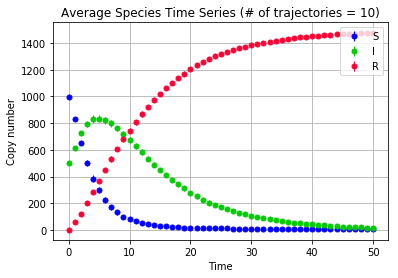

In [13]:
smod.PlotAverageSpeciesTimeSeries(species2plot=["S","I","R"])
P.grid()

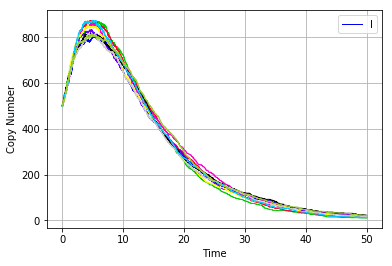

In [14]:
smod.PlotSpeciesTimeSeries(species2plot=["I"])
P.grid()

/home/user/.local/lib/python2.7/site-packages/stochpy/modules/Analysis.py:577: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
  L_bin_edges = np.linspace(dat_min-bin_size/2.0,dat_max+bin_size/2.0,n_bins+1)
/ext/sage/sage-8.8_1804/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


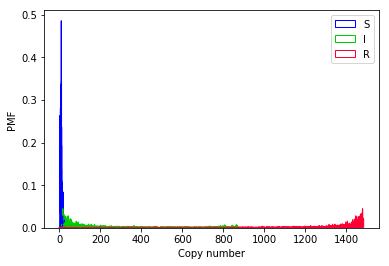

In [15]:
smod.PlotSpeciesDistributions(linestyle= 'solid')

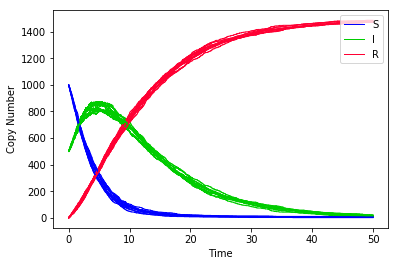

In [16]:

smod.PlotSpeciesTimeSeries(species2plot=["S","I","R"])
